# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Import data

In [2]:
data  = pd.read_csv('student_marks.csv')

In [3]:
data.head()

,Student_ID,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12
0,22000,78,87,91,91,88,98,94,100,100,100,100,93
1,22001,79,71,81,72,73,68,59,69,59,60,61,67
2,22002,66,65,70,74,78,86,87,96,88,82,90,86
3,22003,60,58,54,61,54,57,64,62,72,63,72,76
4,22004,99,95,96,93,97,89,92,98,91,98,95,88


### We delete the Student_ID as it is not needed

In [4]:
data = data.drop(columns=('Student_ID'))

In [5]:
data.head()

,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12
0,78,87,91,91,88,98,94,100,100,100,100,93
1,79,71,81,72,73,68,59,69,59,60,61,67
2,66,65,70,74,78,86,87,96,88,82,90,86
3,60,58,54,61,54,57,64,62,72,63,72,76
4,99,95,96,93,97,89,92,98,91,98,95,88


# Student Scores' - EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Test_1   56 non-null     int64
 1   Test_2   56 non-null     int64
 2   Test_3   56 non-null     int64
 3   Test_4   56 non-null     int64
 4   Test_5   56 non-null     int64
 5   Test_6   56 non-null     int64
 6   Test_7   56 non-null     int64
 7   Test_8   56 non-null     int64
 8   Test_9   56 non-null     int64
 9   Test_10  56 non-null     int64
 10  Test_11  56 non-null     int64
 11  Test_12  56 non-null     int64
dtypes: int64(12)
memory usage: 5.4 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Test_1,56.0,70.750000,17.009356,40.0,57.75,70.5,84.00,100.0
Test_2,56.0,69.196429,17.712266,34.0,55.75,68.5,83.25,100.0
Test_3,56.0,68.089286,18.838333,35.0,53.00,70.0,85.00,100.0
Test_4,56.0,67.446429,19.807179,28.0,54.50,71.5,84.00,100.0
Test_5,56.0,67.303571,20.746890,26.0,53.75,69.0,85.25,100.0
Test_6,56.0,66.000000,21.054043,29.0,50.25,65.5,83.75,100.0
Test_7,56.0,66.160714,21.427914,26.0,47.00,64.0,85.25,100.0
Test_8,56.0,65.303571,22.728372,19.0,45.75,67.5,83.25,100.0
Test_9,56.0,64.392857,23.211814,9.0,44.00,65.5,84.25,100.0
Test_10,56.0,64.250000,22.598673,12.0,45.75,65.5,83.25,100.0


### duplicated

In [8]:
data.duplicated().sum()

0

### Null and Na

In [9]:
data.isnull().sum()

Test_1     0
Test_2     0
Test_3     0
Test_4     0
Test_5     0
Test_6     0
Test_7     0
Test_8     0
Test_9     0
Test_10    0
Test_11    0
Test_12    0
dtype: int64

In [10]:
data.isna().sum()

Test_1     0
Test_2     0
Test_3     0
Test_4     0
Test_5     0
Test_6     0
Test_7     0
Test_8     0
Test_9     0
Test_10    0
Test_11    0
Test_12    0
dtype: int64

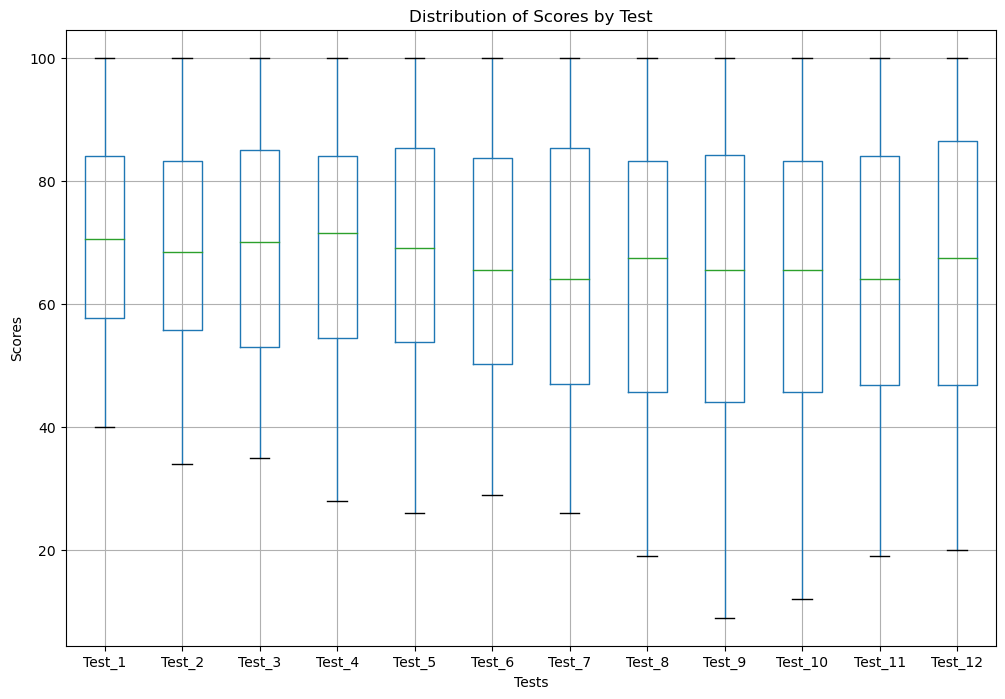

In [11]:
plt.figure(figsize=(12,8))
data.boxplot()
plt.xlabel('Tests')
plt.ylabel('Scores')
plt.title('Distribution of Scores by Test')
plt.show()

### There is no outilne in the dataset

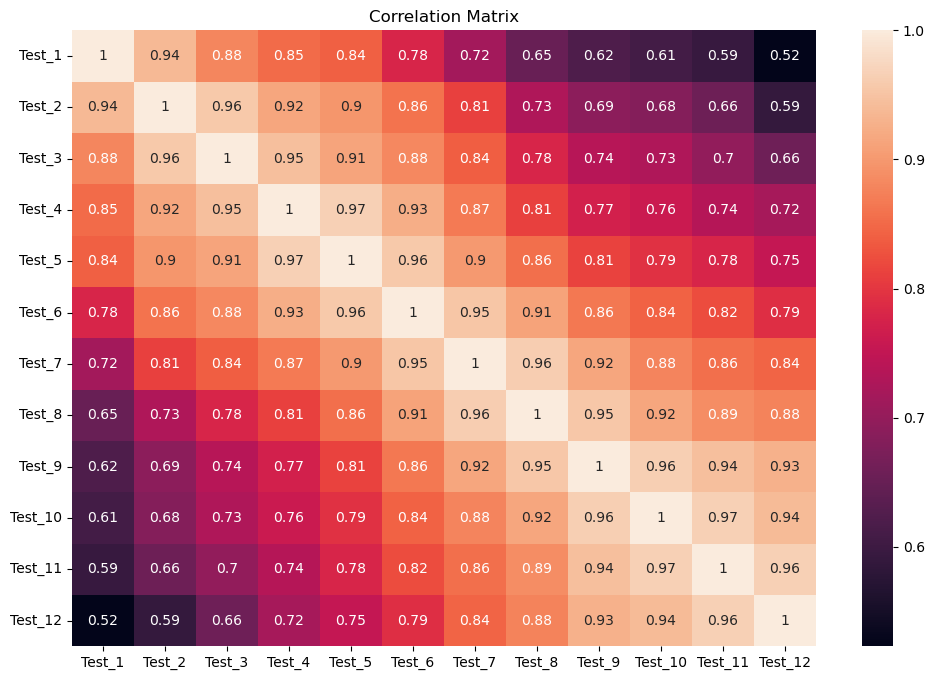

In [12]:
plt.figure(figsize=(12,8))
data_corr =data.corr()
sns.heatmap(data =data_corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [13]:
data_corr

,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12
Test_1,1.000000,0.938303,0.880031,0.851988,0.840035,0.779890,0.716460,0.651198,0.620148,0.607647,0.593512,0.522893
Test_2,0.938303,1.000000,0.955764,0.915807,0.896174,0.859324,0.810377,0.728800,0.690847,0.682862,0.655448,0.589729
Test_3,0.880031,0.955764,1.000000,0.945006,0.912424,0.881350,0.838550,0.778608,0.738340,0.729446,0.697419,0.657443
Test_4,0.851988,0.915807,0.945006,1.000000,0.965350,0.925264,0.866066,0.810431,0.771990,0.761357,0.736368,0.719653
Test_5,0.840035,0.896174,0.912424,0.965350,1.000000,0.955490,0.901121,0.856061,0.813521,0.794620,0.779802,0.753081
Test_6,0.779890,0.859324,0.881350,0.925264,0.955490,1.000000,0.952769,0.911667,0.863957,0.842726,0.822233,0.789600
Test_7,0.716460,0.810377,0.838550,0.866066,0.901121,0.952769,1.000000,0.962670,0.915065,0.877763,0.855109,0.844441
Test_8,0.651198,0.728800,0.778608,0.810431,0.856061,0.911667,0.962670,1.000000,0.953479,0.916001,0.886383,0.876481
Test_9,0.620148,0.690847,0.738340,0.771990,0.813521,0.863957,0.915065,0.953479,1.000000,0.963880,0.944359,0.929161
Test_10,0.607647,0.682862,0.729446,0.761357,0.794620,0.842726,0.877763,0.916001,0.963880,1.000000,0.965858,0.939845


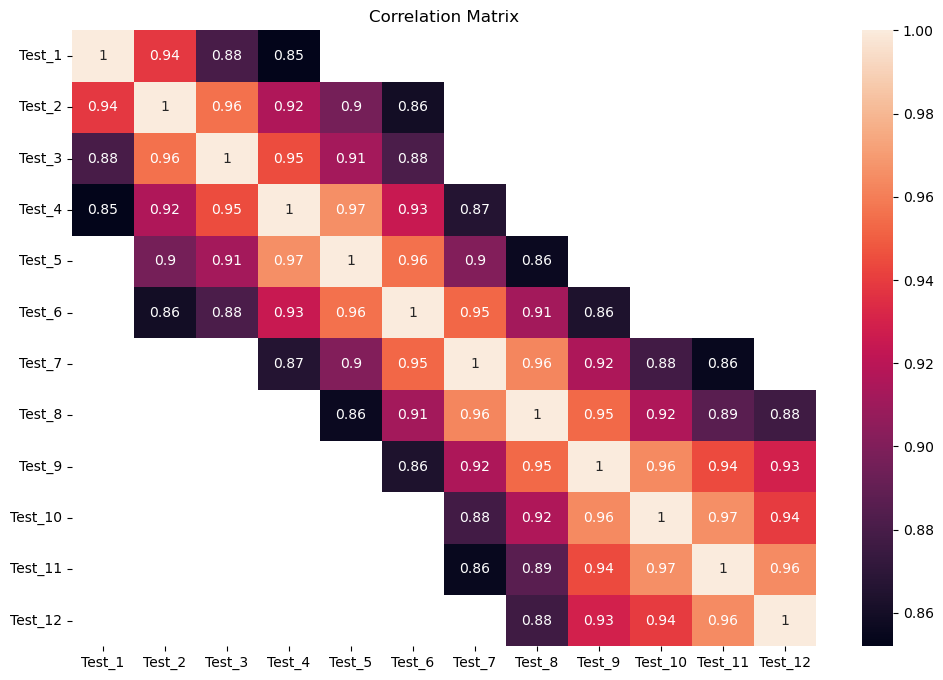

In [14]:
## Adults from 85 percent
high_corr = data_corr[data_corr > 0.85]
plt.figure(figsize=(12,8))
sns.heatmap(data =high_corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

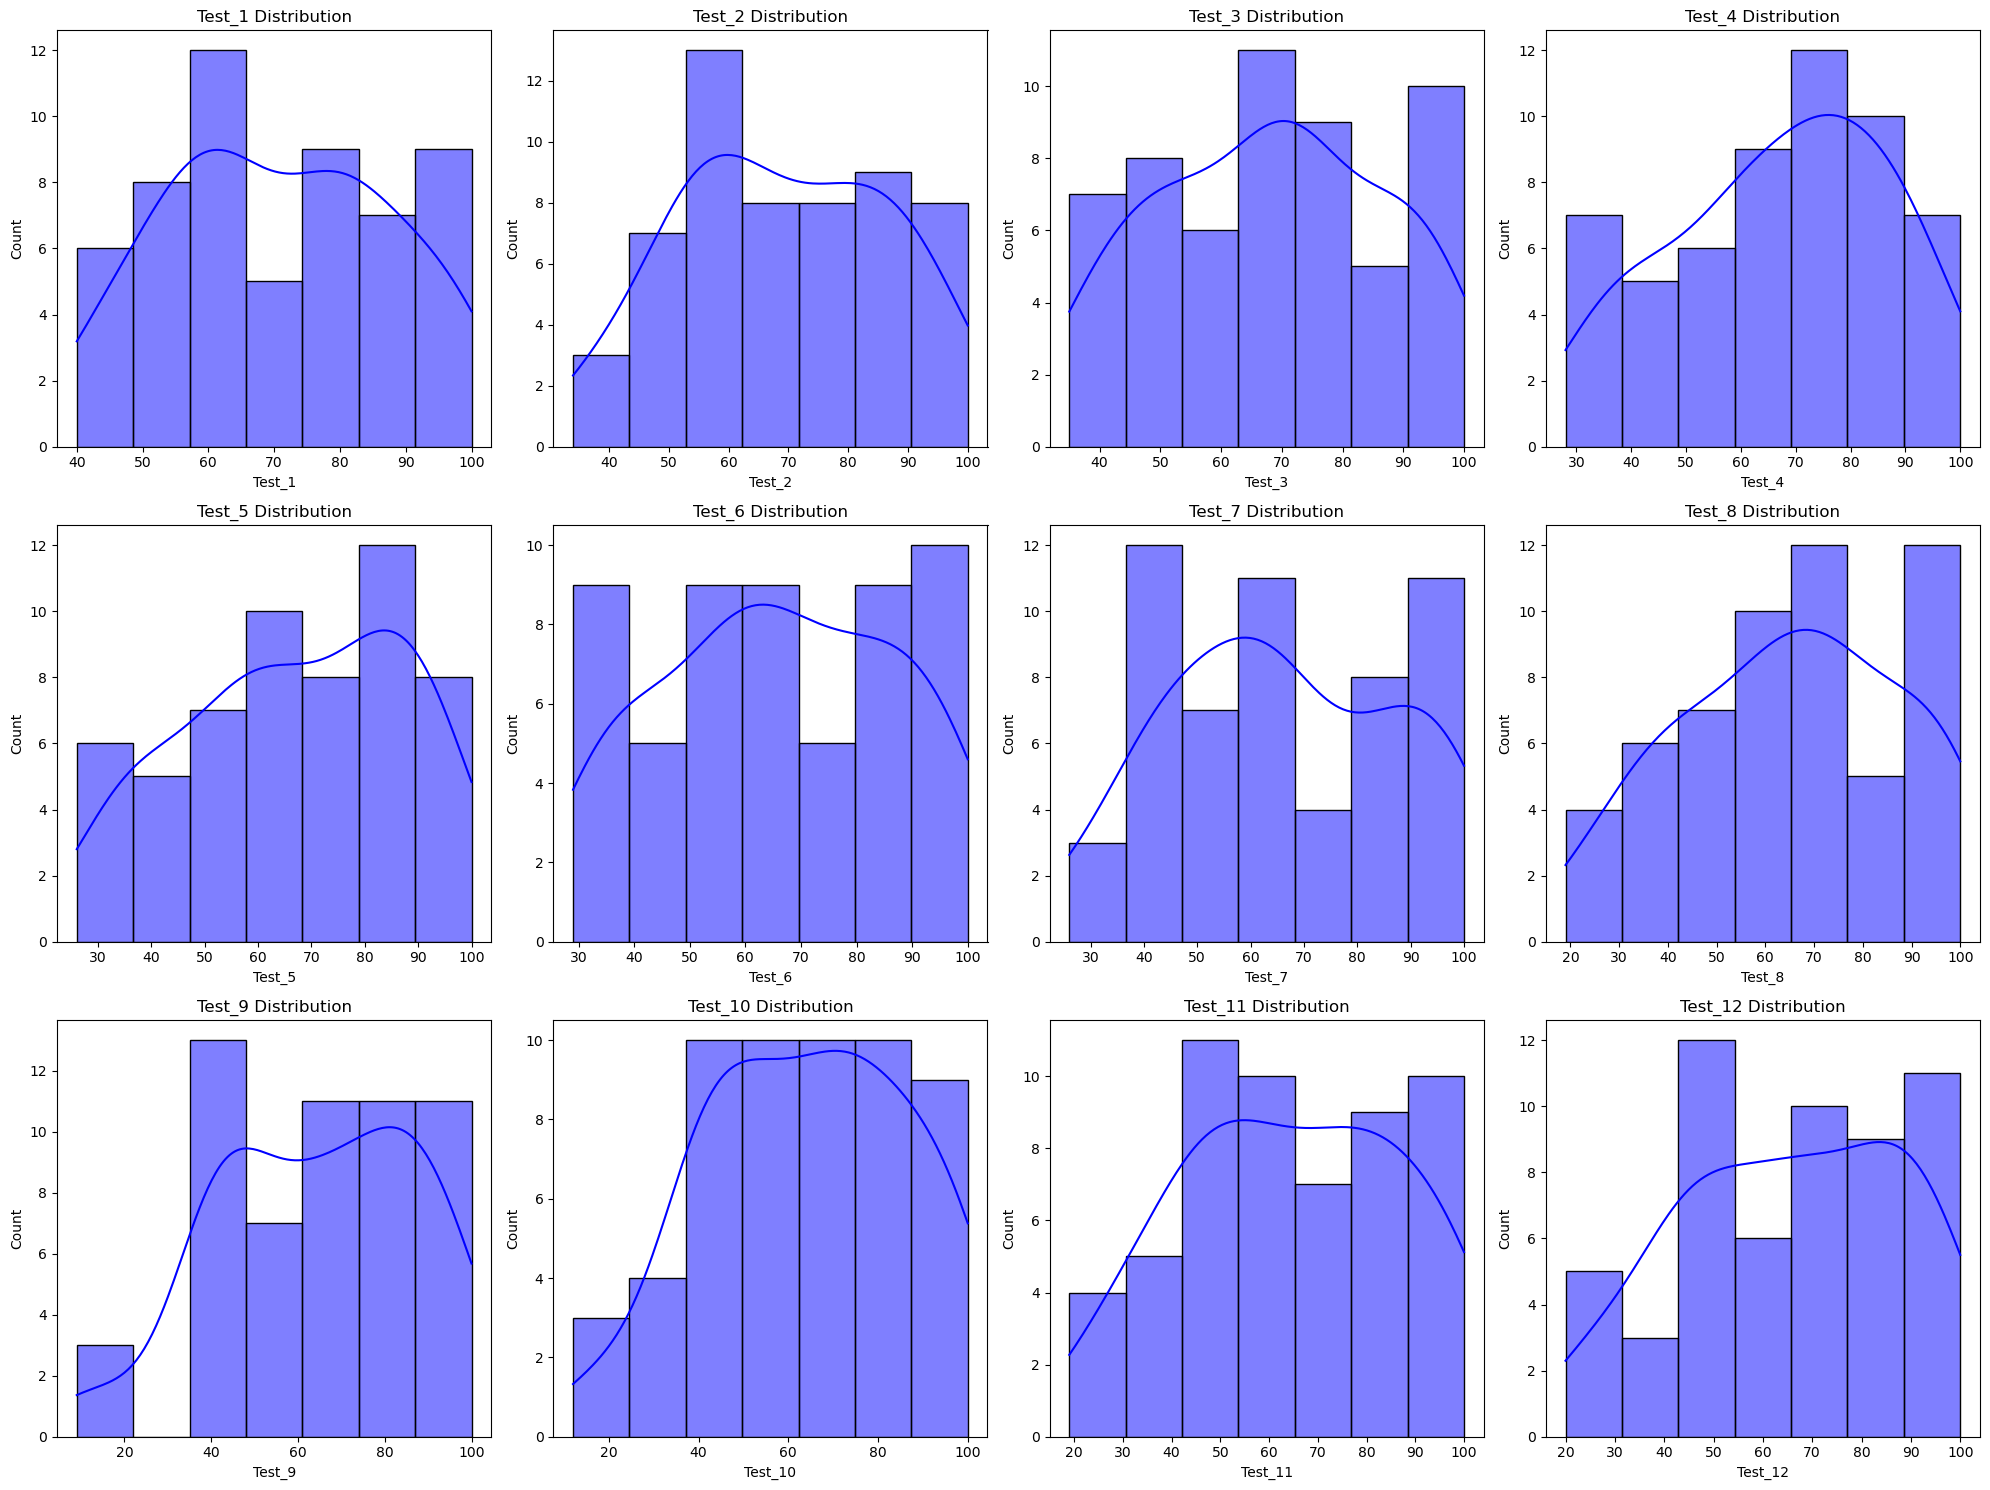

In [15]:


fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
plt.subplots_adjust(hspace=1)

for col, ax in zip(data.columns, axs.ravel()):
    hisplot = sns.histplot(data=data, x=col, ax=ax, kde=True, color="blue")
    hisplot.set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


# Feature Engineering

In [16]:
data1 = data.copy()
data2 = data.copy()

In [17]:
data1['Avg'] = data1.mean(axis = 1)

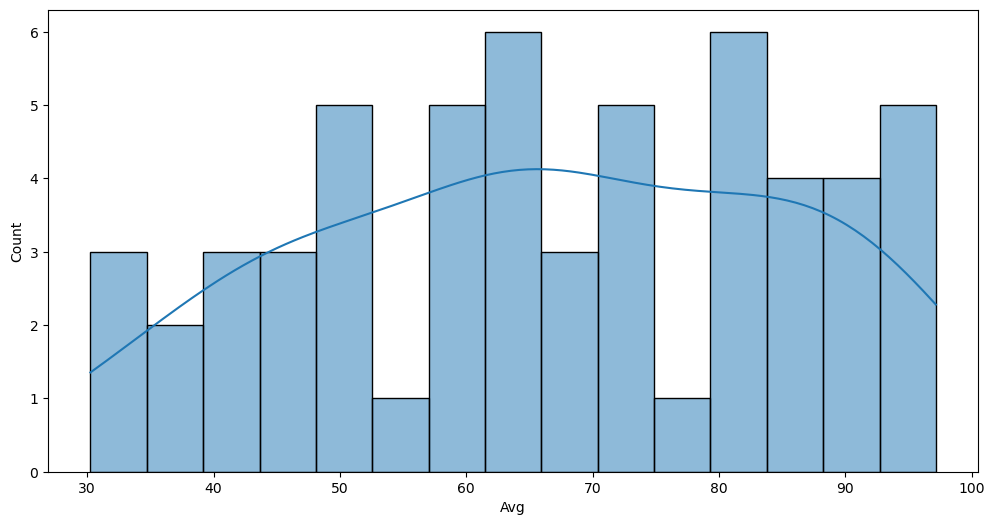

In [18]:
plt.figure(figsize=(12,6))
ax = plt.gca()
sns.histplot(data = data1, x = data1["Avg"],kde=True, ax = ax, bins =15)
plt.show()

In [19]:
scholarship =0
failed = 0

for i in data1['Avg']:
    if i > 70:
        scholarship = scholarship +1
    else:
        failed = failed +1
        
print(f'scholarship - {scholarship}')
print(f'failed - {failed}')

scholarship - 25
failed - 31


In [20]:
def classify_achiever(dt):
    mean = dt.mean()
    if mean < 70:
        return 'scholarship'
    else:
        return 'failed'

data2['achiever'] = data2.apply(classify_achiever, axis=1)
data2.head()

,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12,achiever
0,78,87,91,91,88,98,94,100,100,100,100,93,failed
1,79,71,81,72,73,68,59,69,59,60,61,67,scholarship
2,66,65,70,74,78,86,87,96,88,82,90,86,failed
3,60,58,54,61,54,57,64,62,72,63,72,76,scholarship
4,99,95,96,93,97,89,92,98,91,98,95,88,failed


# Data modelling

In [21]:
for column in data_corr.columns:
    for index, value in data_corr[column].iteritems():
        if value > 0.90 and column != index:
            print(f'Column: {column}, Index: {index}, Correlation: {value}')

Column: Test_1, Index: Test_2, Correlation: 0.9383025166633318
Column: Test_2, Index: Test_1, Correlation: 0.9383025166633318
Column: Test_2, Index: Test_3, Correlation: 0.9557641939530965
Column: Test_2, Index: Test_4, Correlation: 0.9158068442602039
Column: Test_3, Index: Test_2, Correlation: 0.9557641939530965
Column: Test_3, Index: Test_4, Correlation: 0.9450056395342432
Column: Test_3, Index: Test_5, Correlation: 0.9124236662550694
Column: Test_4, Index: Test_2, Correlation: 0.9158068442602039
Column: Test_4, Index: Test_3, Correlation: 0.9450056395342432
Column: Test_4, Index: Test_5, Correlation: 0.9653499717218644
Column: Test_4, Index: Test_6, Correlation: 0.925263611102279
Column: Test_5, Index: Test_3, Correlation: 0.9124236662550694
Column: Test_5, Index: Test_4, Correlation: 0.9653499717218644
Column: Test_5, Index: Test_6, Correlation: 0.9554898961593514
Column: Test_5, Index: Test_7, Correlation: 0.90112142854245
Column: Test_6, Index: Test_4, Correlation: 0.925263611102

C:\Users\Ruslan\AppData\Local\Temp\ipykernel_5880\1268694183.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in data_corr[column].iteritems():


In [22]:
X=data1.drop(columns=["Test_1", "Test_3", "Test_5", "Test_8", "Test_9", "Test_10", "Test_12","Avg"])
y=data1.Avg

In [23]:
X.head()

,Test_2,Test_4,Test_6,Test_7,Test_11
0,87,91,98,94,100
1,71,72,68,59,61
2,65,74,86,87,90
3,58,61,57,64,72
4,95,93,89,92,95


In [24]:
y

0     93.333333
1     68.250000
2     80.666667
3     62.750000
4     94.250000
5     30.250000
6     68.250000
7     65.416667
8     49.333333
9     59.416667
10    39.083333
11    77.583333
12    88.416667
13    30.500000
14    79.750000
15    70.583333
16    70.583333
17    43.416667
18    62.916667
19    60.083333
20    37.916667
21    44.916667
22    32.000000
23    50.166667
24    80.750000
25    86.333333
26    80.250000
27    58.416667
28    72.250000
29    64.500000
30    41.666667
31    95.250000
32    91.250000
33    61.250000
34    86.916667
35    50.583333
36    92.500000
37    74.750000
38    87.250000
39    63.416667
40    83.500000
41    81.250000
42    97.166667
43    72.583333
44    92.416667
45    85.416667
46    39.500000
47    45.000000
48    47.833333
49    62.750000
50    50.083333
51    66.750000
52    60.666667
53    96.416667
54    53.166667
55    48.583333
Name: Avg, dtype: float64

# SVR Model

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_regressor = SVR(kernel='linear', C=1.0)
svm_regressor.fit(X_train, y_train)
y_pred = svm_regressor.predict(X_test)

# Calculating the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 2.86
R-squared Score: 0.99


In [36]:
def e_metrics(model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    r2 = model.score(X_test, y_test)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()
    return R2, adjusted_r2, CV_R2, RMSE
    
    print('RMSE:', round(RMSE,4))
    print('R2:', round(R2,4))
    print('Adjusted R2:', round(adjusted_r2, 4) )
    print("Cross Validated R2: ", round(cv_score.mean(),4) )

In [37]:
ndf = [e_metrics(svm_regressor,X_train,y_train,X_test,y_test,y_pred)]
df_of_results = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
df_of_results.insert(0, 'Model', 'SVR')
df_of_results

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,SVR,0.993625,0.990727,0.977959,1.690123


# Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_lreg = linear_regressor.predict(X_test)

In [40]:
linereg = [evalulation_metrics(linear_regressor,X_train,y_train,X_test,y_test,y_pred_lreg)]

new_row_values = {
    'Model': 'Linear Regression',
    'R2 Score': linereg[0][0],
    'Adjusted R2 Score': linereg[0][1],
    'Cross Validated R2 Score': linereg[0][2],
    'RMSE': linereg[0][3]
}

## add the new row to the dataframe

In [41]:
df_of_results = df_of_results.append(new_row_values, ignore_index=True)
df_of_results

C:\Users\Ruslan\AppData\Local\Temp\ipykernel_5880\2019975235.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_of_results = df_of_results.append(new_row_values, ignore_index=True)


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,SVR,0.993625,0.990727,0.977959,1.690123
1,Linear Regression,0.993817,0.991007,0.981624,1.664475


# SVC

In [42]:
data2

,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12,achiever
0,78,87,91,91,88,98,94,100,100,100,100,93,failed
1,79,71,81,72,73,68,59,69,59,60,61,67,scholarship
2,66,65,70,74,78,86,87,96,88,82,90,86,failed
3,60,58,54,61,54,57,64,62,72,63,72,76,scholarship
4,99,95,96,93,97,89,92,98,91,98,95,88,failed
5,41,36,35,28,35,36,27,26,19,22,27,31,scholarship
6,47,50,47,57,62,64,71,75,85,87,85,89,scholarship
7,84,74,70,68,58,59,56,56,64,70,67,59,scholarship
8,74,64,58,57,53,51,47,45,42,43,34,24,scholarship
9,87,81,73,74,71,63,53,45,39,43,46,38,scholarship


In [43]:
X=data2.drop(columns=["Test_1", "Test_3", "Test_5", "Test_8", "Test_9", "Test_10", "Test_12","achiever"])
y=data2.achiever

In [44]:
X.head()

,Test_2,Test_4,Test_6,Test_7,Test_11
0,87,91,98,94,100
1,71,72,68,59,61
2,65,74,86,87,90
3,58,61,57,64,72
4,95,93,89,92,95


In [45]:
y.head()

0         failed
1    scholarship
2         failed
3    scholarship
4         failed
Name: achiever, dtype: object

In [46]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
# Initialize the SVC model
svc_classifier = SVC(kernel='linear')

# Train the model on the training data
svc_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [49]:
# Make predictions on the test data
y_pred = svc_classifier.predict(X_test)


In [50]:
# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.94
Confusion Matrix:
[[ 6  0]
 [ 1 10]]
Classification Report:
              precision    recall  f1-score   support

      failed       0.86      1.00      0.92         6
 scholarship       1.00      0.91      0.95        11

    accuracy                           0.94        17
   macro avg       0.93      0.95      0.94        17
weighted avg       0.95      0.94      0.94        17

